# Data Visualization and Communicating the results on FordGo Bike system Data

## by (Somasekhar Goud Addakula)




## Introduction
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

>Download dataset <a href='https://s3.amazonaws.com/baywheels-data/index.html'>here</a>

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- The attributes included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

## Univariate Exploration



## 1)Find the month where most users have lend a bike 

> October is the most popular month and July,june fall next. August and september aren't far behind.So,during the period of june-october the bike sharing has been good.

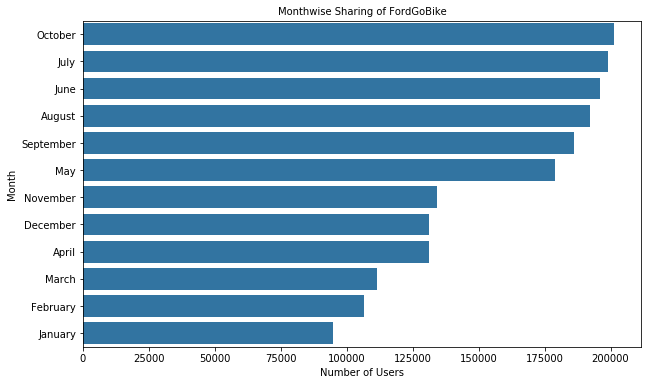

In [121]:
# Monthly usage of ford gobike 
plt.figure(figsize=[10,6])
order_mons = mon_list
sb.countplot(data = df1, y='start_month',color=base_color,order = order_mons);
plt.xlabel('Number of Users',fontsize = 10)
plt.ylabel('Month',fontsize = 10)
plt.title('Monthwise Sharing of FordGoBike',fontsize = 10);

## 2) Usage of ford gobike by different users

> As Number of subscribers who take ride constitute 85% whereas customers constitute 15%.So,Subscriber is the user_type with most usage

Text(0.5, 1.0, 'Usage of ford gobike by different users')

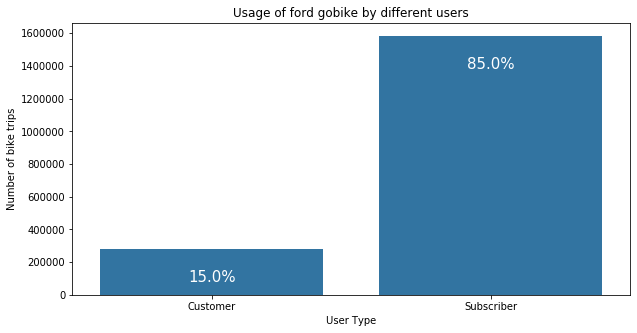

In [201]:
# plotting the number of different types of users
plt.figure(figsize=(10,5))
for j in range(len(ind_list)):
    count = val_list[j]
    percent = '{:0.1f}%'.format(per_list[j])
    plt.text(j,count-200000,percent,ha='center',color='white',fontsize=15)

sb.countplot(data = df , x = 'user_type', color = base_color);
plt.xlabel('User Type',fontsize=10)
plt.ylabel('Number of bike trips',fontsize=10);
plt.title('Usage of ford gobike by different users')

### 3)Average time taken by users for bike sharing

>The average trip rate is nearly 650 seconds. From the it's evident that the popular duration is in the range of 300seconds-1200seconds, which is likely to be more.

Text(0.5, 1.0, 'Durations of Ford Gobike')

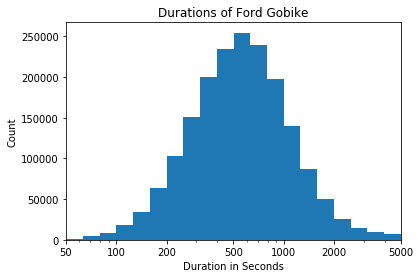

In [286]:
# computing bins for logarithmic axis
#Lets use 1-2-5-10 scheme as 10-3 isnt working
bin_edges = 10**np.arange(0,d.max()+0.1,0.1)
ticks = [50,100,200,500,1000,2000,5000]
xlabels = ['{}'.format(v) for v in ticks]
plt.hist(df.duration_sec, bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks,xlabels)
plt.xlim(50,5000)
plt.xlabel('Duration in Seconds')
plt.ylabel('Count')
plt.title('Durations of Ford Gobike')

## Bivariate Exploration



## 4) Type of User vs The duration of the trip

- Customer trip durations are longer (600-1800 seconds) than for subscribers (450-900 seconds).
- As the count of the subscribers are far more than the Customers.So,count isnt a great metric to find the relationship.Ratio is going to be good metric for comparison.
- So can probably think  by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area

<Figure size 1440x360 with 0 Axes>

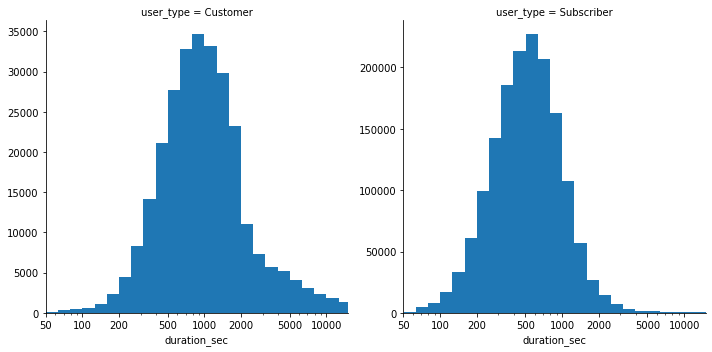

In [341]:
#As the duration_time is continous quantitative variable lets use histogram for better results
plt.figure(figsize=(20,5))
bin_edges = 10**np.arange(0,d.max()+0.1,0.1)
ticks = [50,100,200,500,1000,2000,5000,10000]
xlabels = ['{}'.format(v) for v in ticks]
g=sb.FacetGrid(data=dfb1,col='user_type',xlim=(50,15000),size=5,sharey=False)
g.map(plt.hist,'duration_sec',bins=bin_edges)
plt.xscale('log')
plt.xticks(ticks,xlabels);

## 5) Type of User vs Starting_hour

- The bike sharing for the user_type 'Customer' has been increasing from 10am to 5pm.
- The bike sharing for the user_type 'Subscriber' has been highest from 8am and decreases till 11am and gradually increases 12.00pm to 5pm(Literally you can imagine of nearly a curve of 'U' shape)
- from 12.00am-5.00am which is very less which is expected as usually!

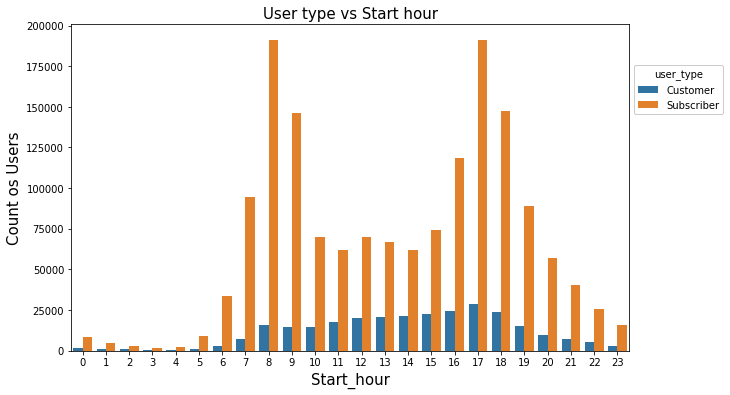

In [371]:
#As both of them are categorical variables lets used stacked barcharts
plt.figure(figsize=(10,6))
ax=sb.countplot(data=dfb2,x='start_hour',hue='user_type')
plt.xlabel('Start_hour',fontsize = 15)
plt.ylabel('Count os Users',fontsize=15)
plt.title('User type vs Start hour',fontsize=15);
plt.legend(framealpha=1,title='user_type',loc = 6, bbox_to_anchor = (1.0, 0.8));

## 6)  Week day usage of bike sharing by user_type

- Customers have a very low usage of the bike share system when compared to Subscribers.
- But,there is a sharp decrease in the count from friday to saturday of Subscriber(During the weekends i.e on saturday and sunday there is less usage of the bike sharing service.This might be because of the weekend holidays!)

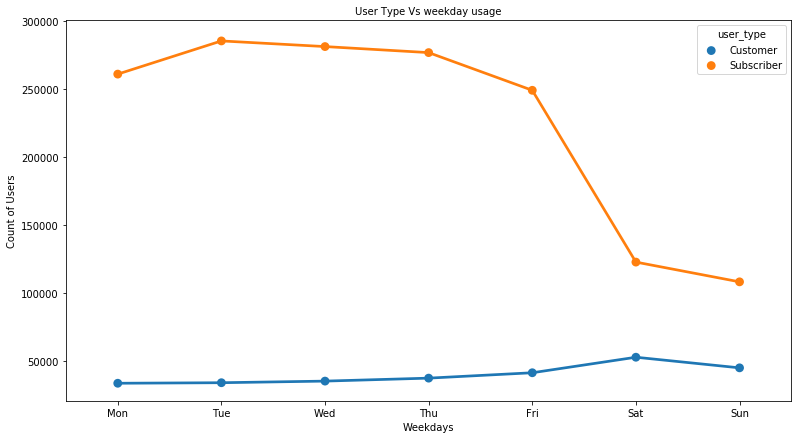

In [370]:
# As it is qualitative vs qualitative variable, any of the point plot or clustered bar charts can be used to visulize
#Lets use pointplot to visualize
plt.figure(figsize=(13, 7))

weekday_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.pointplot(data=dfb3, x='start_weekday', y='count', hue = 'user_type', order = weekday_list);
#poslishing the plot
plt.title('User Type Vs weekday usage', fontsize=10)
plt.xlabel('Weekdays',fontsize=10)
plt.ylabel('Count of Users',fontsize=10);

## Multivariate Exploration



## 7) Montly daywise analysis of average trip duration

 The Average trip duration in every month has registered its highest values on the weekends i.e on the saturday and sunday!followed by the rest of the weekdays have having closer values to each other.The minimum average trip duration has been more than 600seconds i.e 5mins on everyday of every month!

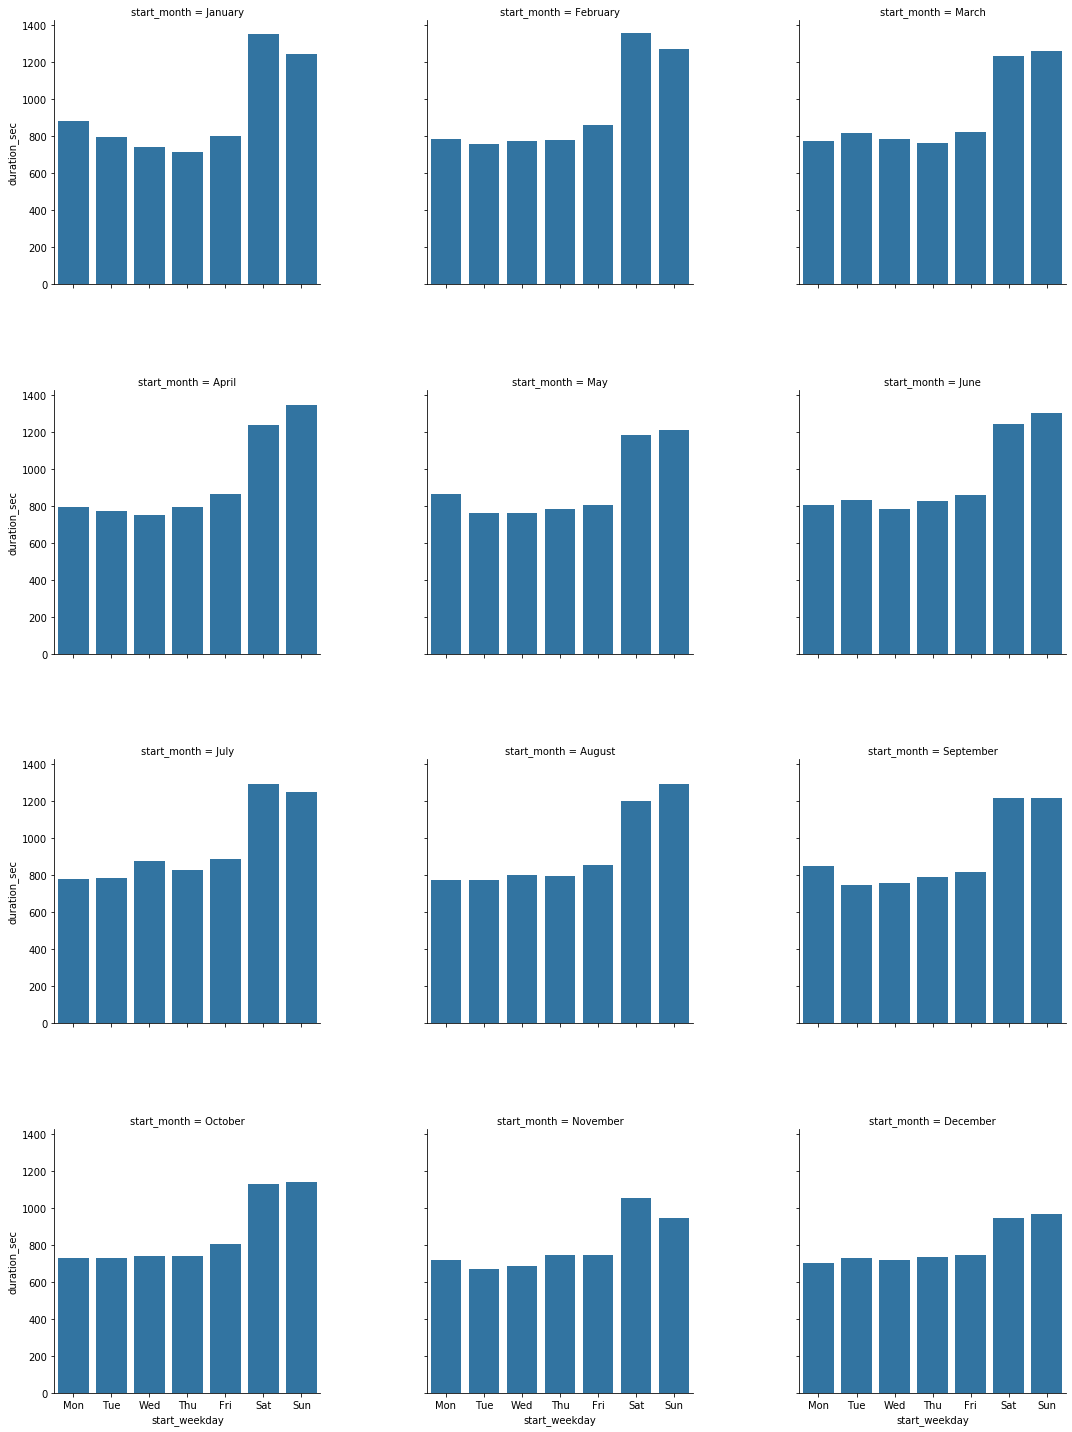

In [393]:
#Here,start_month,start_weekday are categorical variable and average duration time is continuous quantitative variable
#so,Lets apply the FacetGrid
#For setting the labels for individualsubplots
#g.axes[0,0].set_xlabel('axes label 1')
#g.axes[0,1].set_xlabel('axes label 2')

order_months= ['January','February','March','April','May','June','July','August','September','October','November','December']
order_weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

g=sb.FacetGrid(data=dfm11,col='start_month',col_wrap=3,size=5,col_order=order_months)
g.map(sb.barplot,'start_weekday','duration_sec',order=order_weekdays)
#As the plot looked very near i have added the hspace and wspace
#where hspace is the space in height, and wspace is the space width direction.
plt.subplots_adjust(hspace=0.4, wspace=0.4)

## Summary
> Different usage pattern/habit between the two type of riders are seen from the exploration. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 5-6pm on work days for subscribers, yet customers tend to use more in the late afternoon around 17pm Monday to Friday.

> The multivariate exploration of data strengthened some of the patterns discovered in the bivariate exploration and univariate exploration, the relationship between multiple variables plotted is visualized altogether and information are presented combined. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours(8-9am and 5-6pm) Monday through Friday, indicating the use is primarily for work commute. The more flexible and relaxing pattern of customer usage shows that they're taking advantage of the bike sharing system differently from the subscribers, heavily over weekends for city tour or leisure purpose probably.
